# Solving Gravitational Potential of Spherically Symmetric Star

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from multigrid import BVP, BVPSolver

## Relaxation and Residual for the Differential Operator

In [2]:
def relax_left(sol, src, s, h):
    return sol[1] - src[0]*h**2/6

def relax_middle(sol, src, s, h, i):
    return (
        + sol[i + 1]*(1 + h/s)
        + sol[i - 1]*(1 - h/s)
        - src[i]*h**2
    )/2

def relax_right(sol, src, s, h):
    return 0

def residual_left(sol, src, s, h):
    return -(relax_left(sol, src, s, h) - sol[0])*6/h**2

def residual_middle(sol, src, s, h, i):
    return -(relax_middle(sol, src, s, h, i) - sol[i])*2/h**2

def residual_right(sol, src, s, h):
    return 0

## Functions for the Source and the Exact Solution

In [3]:
r_s = 8
rho_c = 1.28e-3

def src(s):
    if s < 0.5:
        rho = rho_c*(1 - (s / (1 - s))**2)
        return 4*np.pi*rho*r_s**2*(1 - s)**(-4)
    else:
        return 0

def exact_sol(s):
    if s < 0.5:
        a = s/(1 - s)
        return -2*np.pi*rho_c*r_s**2*(1/2 - a**2/3 + a**4/10)
    else:
        return -8/15*np.pi*rho_c*r_s**2*(1 - s)/s

## Define Boundary Value Problem

In [4]:
s1 = 0
s2 = 1
bvp = BVP((s1, s2), relax_left, relax_middle, relax_right, residual_left, residual_middle, residual_right, src, exact_sol_func=exact_sol)

## Set Multigrid Solver

In [5]:
n = 16
solver = BVPSolver(bvp, n, num_iter=(4,1,4))

## Solving

In [9]:
number_of_iter = 10
start = time.time()
for i in range(number_of_iter):
    solver.solve()
    res_rms = solver.residual().rms()
    print(i, res_rms/2**n, solver.exact_error().rms())
print("time : {} s".format((time.time() - start)/number_of_iter))

0 3.479631785956444e-13 5.2554654532439785e-11
1 3.4297588490539576e-13 5.37241039675537e-11
2 3.554358984583773e-13 5.623431105193802e-11
3 3.6150121132011573e-13 6.049313694133835e-11
4 3.765952507561537e-13 6.076854382901051e-11
5 3.296103587588851e-13 6.400383744657576e-11
6 3.462570149016996e-13 6.532514849905044e-11
7 3.3176545448455096e-13 6.744876944726181e-11
8 3.3788645517453673e-13 6.970289394003682e-11
9 3.078830742269231e-13 7.3133718469279e-11
time : 1.73505597114563 s


## Plot Solution

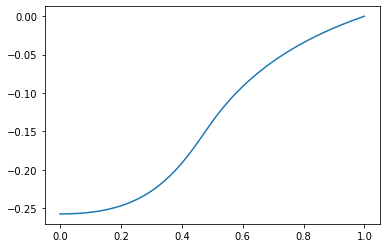

In [7]:
plt.plot(solver.sol_grid.x, solver.sol_grid.val)